# **VODAFONE CLASSIFICATION AND PREDICTING CUSTOMER CHURN PROJECT**

##  **Business Understanding**

## Introduction

### Customer churn is a big concern for many organisations and companies in business today. This project is designed to analyze the probability of customers leaving the organization, identify crucial indicators of churn, and propose actionable retention strategies to mitigate this issue.

 ## **Project Description;** 
 
 ### The aim of this project is to build a roobust machine learning pipeline to predict whether certain customers will churn from the organization or not. Predictive modeling will be done after deep analysis of the dataset provided by the marketing team. 

 ## **The Hypothesis**

 ### **Null Hypothesis:** The monthly subscription cost  has no significant effect on customer churn (Churn) from the safari network service.. 

 ### **Alternative Hypothesis:** The monthly subscription cost  has a significant effect on customer churn (Churn) from the safari network service.. 

## **The Analytical Questions**

### 1. What are the key factors influencing customer churn in the organization?
### 2. What is the relation between gender in predicting churn?
### 3. What is the effect of changes in pricing or service plans on customer churn?
### 4. Are there specific patterns or trends in customer behavior leading to churn?
### 5. How does the method of payment impact customer churn?

##  **Data Understanding**

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

## 1. Importing the relevant libraries and modules

In [1]:
import pyodbc
from dotenv import dotenv_values
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import joblib
import os 

In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [5]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("servername")
database = environment_variables.get("databasename")
username = environment_variables.get("user")
password = environment_variables.get("password")
table =environment_variables.get("tablename")

#connection_string = f"DRIVER={{SQL Server}}; servername={server};databasename={database};user={username};password={password};table={table}"
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [6]:
# Establish a connection to the database using the provided connection string.
connection= pyodbc.connect(connection_string)

# 2. Loading data

In [7]:

# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.LP2_Telco_churn_first_3000"

 
# Read data from the SQL query result
df_churn_first_3000 = pd.read_sql(query, connection)
 
 # Display the first few rows of the DataFrame
df_churn_first_3000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [8]:
df_churn_first_3000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
df_churn_first_3000.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Loading the second dataset

In [10]:
df_churn_Second_2000= pd.read_csv('Dataset/LP2_Telco-churn-second-2000.csv')
# Display the first few rows of the DataFrame
df_churn_Second_2000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [11]:
df_churn_Second_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [12]:
df_churn_Second_2000.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Loading the last dataset

In [13]:
# Load the test data
df_churn_last_2000 = pd.read_excel('Dataset/Telco-churn-last-2000.xlsx')
 # Display the first few rows of the DataFrame
df_churn_last_2000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [14]:
df_churn_last_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [15]:
df_churn_last_2000['SeniorCitizen'] = df_churn_last_2000['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
df_churn_last_2000['TotalCharges'] = pd.to_numeric(df_churn_last_2000['TotalCharges'], errors='coerce')

In [16]:
# Check the number of columns and rows in each data
df_churn_first_3000.shape,df_churn_Second_2000.shape,df_churn_last_2000.shape

((3000, 21), (2043, 21), (2000, 20))

In [17]:
# Check for duplicated rows if any in the first 3000 data points
df_churn_first_3000.duplicated().sum()

0

In [18]:
# Check for duplicated rows if any in the first 3000 data points
df_churn_Second_2000.duplicated().sum()

0

In [19]:
# Check for duplicated rows if any in the first 3000 data points
df_churn_last_2000.duplicated().sum()

0

In [20]:
# check unique values for the first 3000 dataFrame
unique_values_per_column = df_churn_first_3000.apply(pd.unique)
print(unique_values_per_column)


customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                           [False, True]
Partner                                                 [True, False]
Dependents                                              [False, True]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                            [False, True]
MultipleLines                                     [None, False, True]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                                    [False, True, None]
OnlineBackup                                      [True, False, None]
DeviceProtection                                  [False, True, None]
TechSupport                                       [False, True, None]
StreamingTV                                       [False, True, None]
StreamingMovies     

In [21]:
# Display summary statistics for Concatenated dataset
df_churn_first_3000.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [22]:
# check unique values for the second 2000 dataFrame
unique_values_per_column = df_churn_Second_2000.apply(pd.unique)
print(unique_values_per_column)
    

customerID          [5600-PDUJF, 8292-TYSPY, 0567-XRHCU, 1867-BDVF...
gender                                                 [Male, Female]
SeniorCitizen                                                  [0, 1]
Partner                                                     [No, Yes]
Dependents                                                  [No, Yes]
tenure              [6, 19, 69, 11, 64, 39, 15, 25, 66, 61, 43, 12...
PhoneService                                                [Yes, No]
MultipleLines                             [No, No phone service, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [No, Yes, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [Yes, No, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

In [23]:
df_churn_Second_2000['SeniorCitizen'] = df_churn_Second_2000['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [24]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
df_churn_Second_2000['TotalCharges'] = pd.to_numeric(df_churn_Second_2000['TotalCharges'], errors='coerce')

In [25]:
# Display summary statistics for Concatenated dataset
df_churn_Second_2000.describe()

,tenure,MonthlyCharges,TotalCharges
count,2043.000000,2043.000000,2040.000000
mean,32.649046,64.712555,2303.214681
std,24.376248,29.970010,2261.934905
min,0.000000,18.550000,18.850000
25%,9.000000,35.825000,434.250000
50%,30.000000,70.250000,1398.275000
75%,55.000000,89.625000,3846.962500
max,72.000000,118.350000,8670.100000


In [26]:
# check unique values for the last 2000 dataFrame
unique_values_per_column = df_churn_last_2000.apply(pd.unique)
print(unique_values_per_column)

customerID          [7613-LLQFO, 4568-TTZRT, 9513-DXHDA, 2640-PMGF...
gender                                                 [Male, Female]
SeniorCitizen                                               [No, Yes]
Partner                                                     [No, Yes]
Dependents                                                  [No, Yes]
tenure              [12, 9, 27, 1, 24, 14, 32, 11, 38, 54, 29, 44,...
PhoneService                                                [Yes, No]
MultipleLines                             [Yes, No, No phone service]
InternetService                                [Fiber optic, No, DSL]
OnlineSecurity                         [No, No internet service, Yes]
OnlineBackup                           [No, No internet service, Yes]
DeviceProtection                       [No, No internet service, Yes]
TechSupport                            [No, No internet service, Yes]
StreamingTV                            [Yes, No internet service, No]
StreamingMovies     

In [27]:
# Display summary statistics for Concatenated dataset
df_churn_last_2000.describe()

,tenure,MonthlyCharges,TotalCharges
count,2000.000000,2000.000000,1997.000000
mean,31.853000,63.933325,2235.995093
std,24.632677,30.136858,2259.794309
min,0.000000,18.250000,18.900000
25%,8.000000,34.250000,353.650000
50%,27.000000,69.800000,1388.450000
75%,55.000000,89.275000,3632.000000
max,72.000000,118.750000,8684.800000


In [28]:
# Check for missing values in columns
missing_values = df_churn_first_3000.isnull().sum()

# Display columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
MultipleLines       269
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
TotalCharges          5
Churn                 1
dtype: int64


In [29]:
# Check for missing values in columns
missing_values = df_churn_Second_2000.isnull().sum()

# Display columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
TotalCharges    3
dtype: int64


In [30]:
# Check for missing values in columns
missing_values = df_churn_last_2000.isnull().sum()

# Display columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
TotalCharges    3
dtype: int64


### <b> 3. Exploratory Data Analysis

### Merging the first and second data sets

In [31]:
# Concatenate the rows from df_first_3000 with all rows from df_second_2000 to create the training dataset.
train = pd.concat([df_churn_first_3000, df_churn_Second_2000],ignore_index=True)

# Verify the structure of the combined dataset
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [33]:
train.shape

(5043, 21)

In [34]:
train.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [35]:
# inspecting the combined data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [36]:
# check unique values
unique_values_per_column = train.apply(pd.unique)
print(unique_values_per_column)

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                  [False, True, No, Yes]
Partner                                        [True, False, No, Yes]
Dependents                                     [False, True, No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                   [False, True, Yes, No]
MultipleLines          [None, False, True, No, No phone service, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity      [False, True, None, No, Yes, No internet service]
OnlineBackup        [True, False, None, No, Yes, No internet service]
DeviceProtection    [False, True, None, No, Yes, No internet service]
TechSupport         [False, True, None, Yes, No, No internet service]
StreamingTV         [False, True, None, No, Yes, No internet service]
StreamingMovies     

In [37]:
# Display summary statistics for Concatenated dataset
train.describe()

,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5035.000000
mean,32.576641,65.090214,2302.062861
std,24.529807,30.068133,2269.483576
min,0.000000,18.400000,18.799999
25%,9.000000,35.775000,417.675003
50%,29.000000,70.550003,1401.150024
75%,56.000000,90.050003,3862.000000
max,72.000000,118.650002,8670.100000


1. Tenure: The average tenure is 32.5 months, with a standard deviation of 24.5 months. The minimum tenure is 0 months and the maximum tenure is 72 months. 

2. MonthlyCharges: The average monthly charge is $65, with a standard deviation of $30.06. The minimum monthly charge is $18.4 and the maximum monthly charge is $118.65.

3. TotalCharges: The average total charge is $2302.06, with a standard deviation of $2269.48. The minimum total charge is $18.79 and the maximum total charge is $8670.10.

# Observations point

1. Distribution: the right-skewed distribution for tenure, monthly charges, and total charges indicates that most customers fall on the lower end of the spectrum. This could suggest a customer base with a majority of newer or lower-spending individuals.

2. Standard deviation: The large standard deviations in each variable confirm your point about high variability. Some customers have significantly longer tenures, higher monthly charges, or greater total spending compared to the average.

3. Correlation: The positive correlation between tenure and both monthly and total charges is a valuable finding. It suggests that as customers stay with the company longer, they tend to spend more on average. This could be due to factors like increased service usage, contract upgrades, or loyalty programs.

In [38]:
train.describe(include= 'object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
SeniorCitizen,5043,4,False,2525
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320


## Issues with the data

## **1. Accuracy:**

Standardize the representation of categorical values across all datasets. For instance, ensure that 'Yes' consistently corresponds to 'True' and 'No' corresponds to 'False' across all categorical columns.
Consider transforming these columns to ensure uniformity. 

## **2. Validity:**

Convert the 'TotalCharges' column in the second and third datasets from the object data type to float to allow for numerical operations. This may involve handling any non-numeric characters that prevent direct conversion.
Use appropriate data cleaning techniques like astype() in Pandas or data transformation functions in other programming languages to convert data types.

## **3. Consistency:**

Investigate and reconcile inconsistent values across categorical columns in the three datasets. It might involve identifying common categorical columns and ensuring uniformity of values within these columns.
Create mapping tables or dictionaries to transform inconsistent values into a consistent format across datasets.

## **4. Completeness:**

For missing data in the Churn column and other columns in the first dataset, consider imputation techniques if the missing data isn't substantial. Imputation could involve using statistical measures like mean, median, or mode to fill in missing values.
Alternatively, if missing data is significant or systematic, evaluate the impact and consider collecting or sourcing that missing data if possible.



## **Data Cleaning:**

Dropped the customer Id because I felt it was not important for our analysis

In [39]:
#drop customer ID.
del train['customerID']

In [40]:
# Define a dictionary for mapping boolean and None values to more meaningful categories
new_cat_values_mapping = {
    'MultipleLines': {True: 'Yes', False: 'No'},
    'OnlineSecurity': {True: 'Yes', False: 'No'},
    'OnlineBackup': {True: 'Yes', False: 'No'},
    'DeviceProtection': {True: 'Yes', False: 'No'},
    'TechSupport': {True: 'Yes', False: 'No'},
    'StreamingTV': {True: 'Yes', False: 'No'},
    'StreamingMovies': {True: 'Yes', False: 'No'},
    'Churn': {True: 'Yes', False: 'No'},
    'Partner': {True: 'Yes', False: 'No'},
    'Dependents': {True: 'Yes', False: 'No'},
    'PaperlessBilling': {True: 'Yes', False: 'No'},
    'PhoneService': {True: 'Yes', False: 'No'}
    
}

# Use the replace method to map the categorical values in the DataFrame
train.replace(new_cat_values_mapping, inplace=True)

In [41]:
# check unique values for the first 3000 dataFrame
unique_values_per_column = df_churn_first_3000.apply(pd.unique)
print(unique_values_per_column)

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                           [False, True]
Partner                                                 [True, False]
Dependents                                              [False, True]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                            [False, True]
MultipleLines                                     [None, False, True]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                                    [False, True, None]
OnlineBackup                                      [True, False, None]
DeviceProtection                                  [False, True, None]
TechSupport                                       [False, True, None]
StreamingTV                                       [False, True, None]
StreamingMovies     

In [42]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')

# Verify the data type after conversion
train['TotalCharges'].dtype, 

(dtype('float64'),)

In [43]:
# Verify the data type after conversion
df_churn_Second_2000['TotalCharges'].dtype, df_churn_last_2000['TotalCharges'].dtype

(dtype('float64'), dtype('float64'))

In [44]:
#Convert 'SeniorCitizen' to object in  dataset

train['SeniorCitizen'] = train['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})


In [45]:
# inspecting the combined data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [46]:
train.shape

(5043, 20)

### <b> Univariate Data analysis

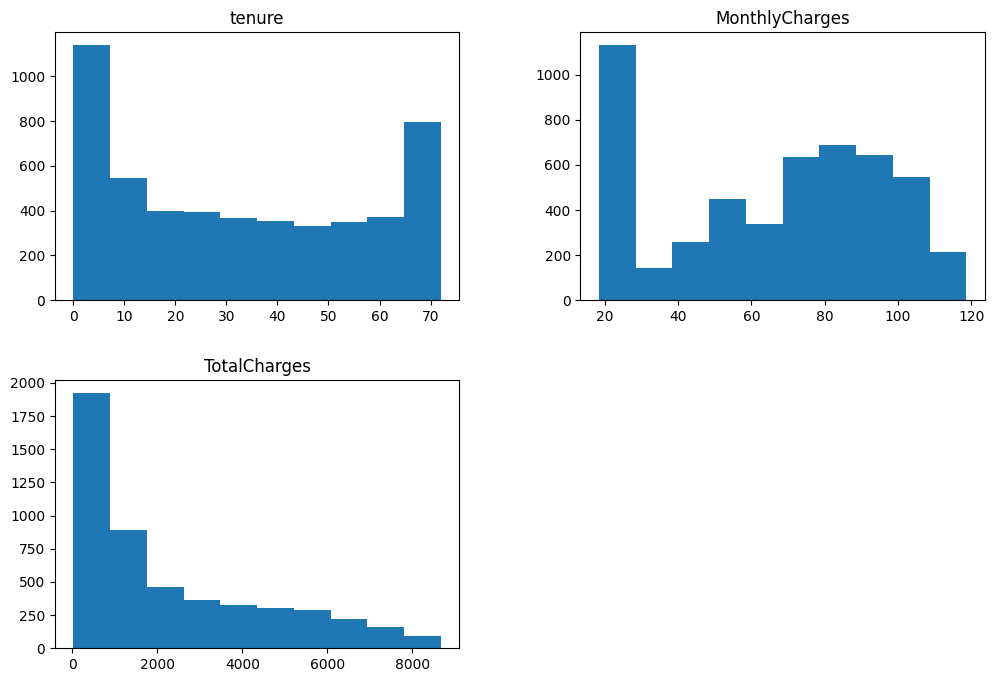

In [47]:
# Visualizing the distribution of Numerical Variables
train.hist(figsize=(12,8), grid= False)
plt.show()

# Key observations:

1. Tenure:

The average tenure is indeed 32.5 months, shows a right-skewed distribution, with more customers having tenures between 0 and 35 months than those with longer tenures. This confirms your observation that most customers are relatively new.
It's interesting to note the second-highest bar at 60 months. This suggests a potential segment of customers who stay for around five years but don't tend to stay much longer.

2. Monthly Charges:

The average monthly charge of $65 aligns with your previous description. Similar to tenure, the distribution is right-skewed, with most customers having charges between $0 and $90. The long tail extending towards higher charges indicates the presence of some high-spending customers.
The two highest bars are at $50 and $60. This suggests a concentration of customers around these charge levels, potentially representing common service plans or pricing tiers.

3. Total Charges:

The right-skewed distribution holds true for total charges as well, with the majority falling between $0 and $1400. The long tail again highlights outliers with significantly higher spending, reaching up to $8670.10 as you mentioned.
Similar to monthly charges, the two highest bars are at $400 and $600. This suggests a clustering of customers around these total spending levels, possibly due to contract periods or specific usage patterns.

### Checking for outliers

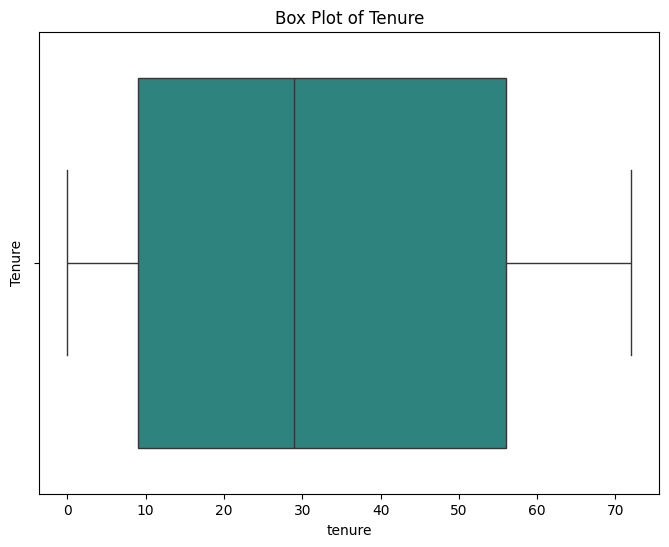

In [48]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'tenure' column
sns.boxplot(x=train['tenure'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of Tenure')
plt.ylabel('Tenure')

# Show the plot
plt.show()


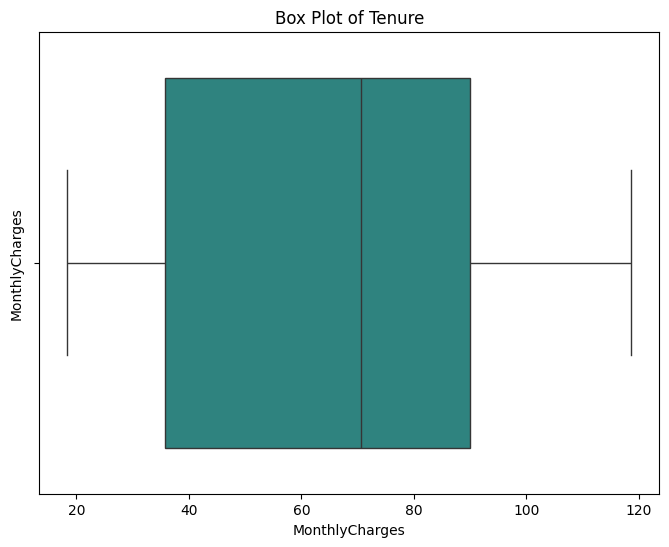

In [49]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'MonthlyCharges' column
sns.boxplot(x=train['MonthlyCharges'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of Tenure')
plt.ylabel('MonthlyCharges')

# Show the plot
plt.show()

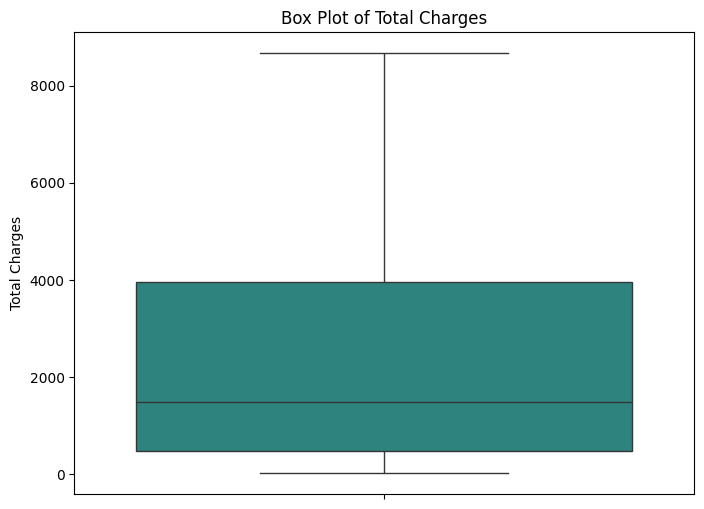

In [50]:
# Remove duplicate rows based on 'TotalCharges' column and reset index
train_unique_total_charges = train.drop_duplicates(subset='TotalCharges').reset_index(drop=True)

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'TotalCharges' column without duplicates
sns.boxplot(y=train_unique_total_charges['TotalCharges'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of Total Charges')
plt.ylabel('Total Charges')

# Show the plot
plt.show()

. There seems to be no outliers on the numerical columns.


**Univariate Analysis of Feature: gender**
count     5043
unique       2
top       Male
freq      2559
Name: gender, dtype: object

Unique Values and Counts:
gender
Male      2559
Female    2484
Name: count, dtype: int64

Missing Values: 0 (0.00%)


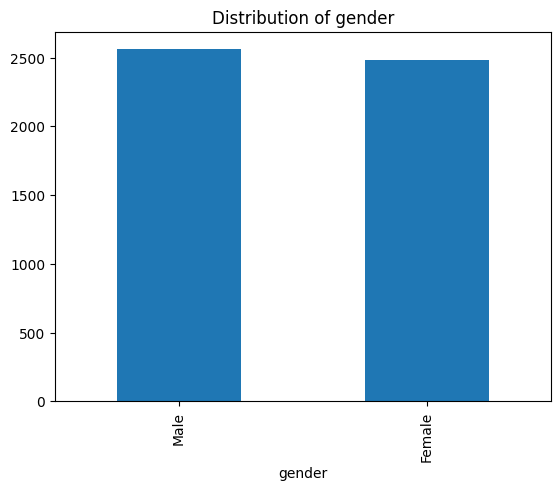


**Univariate Analysis of Feature: SeniorCitizen**
count     5043
unique       2
top         No
freq      4224
Name: SeniorCitizen, dtype: object

Unique Values and Counts:
SeniorCitizen
No     4224
Yes     819
Name: count, dtype: int64

Missing Values: 0 (0.00%)


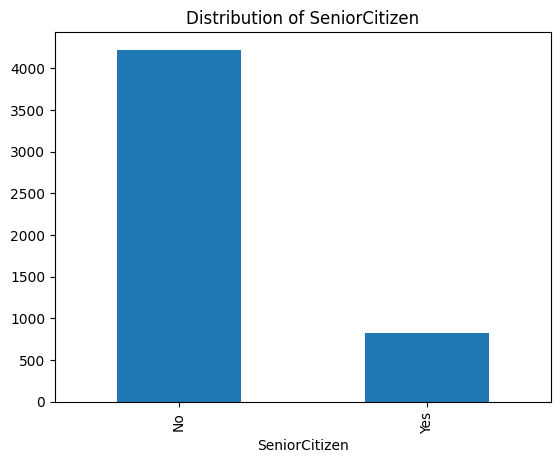


**Univariate Analysis of Feature: Partner**
count     5043
unique       2
top         No
freq      2585
Name: Partner, dtype: object

Unique Values and Counts:
Partner
No     2585
Yes    2458
Name: count, dtype: int64

Missing Values: 0 (0.00%)


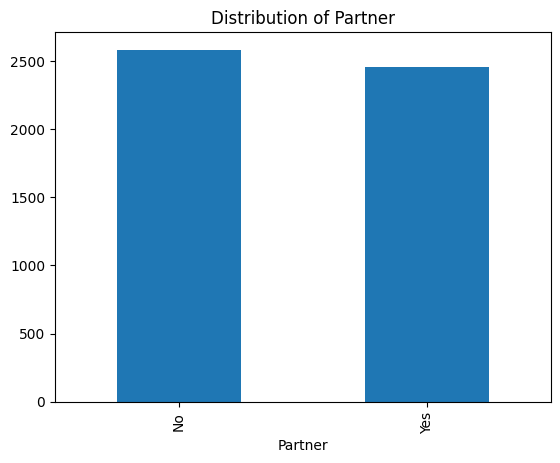


**Univariate Analysis of Feature: Dependents**
count     5043
unique       2
top         No
freq      3482
Name: Dependents, dtype: object

Unique Values and Counts:
Dependents
No     3482
Yes    1561
Name: count, dtype: int64

Missing Values: 0 (0.00%)


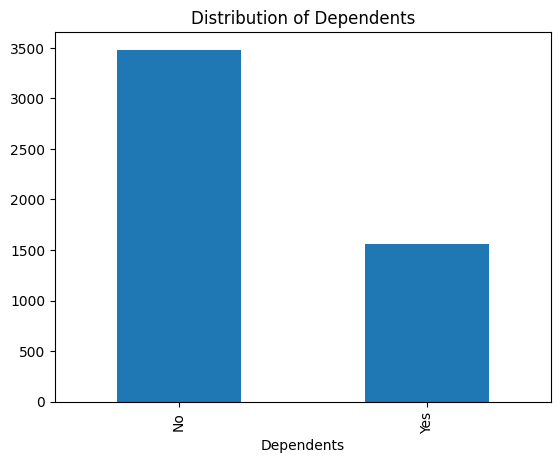


**Univariate Analysis of Feature: PhoneService**
count     5043
unique       2
top        Yes
freq      4554
Name: PhoneService, dtype: object

Unique Values and Counts:
PhoneService
Yes    4554
No      489
Name: count, dtype: int64

Missing Values: 0 (0.00%)


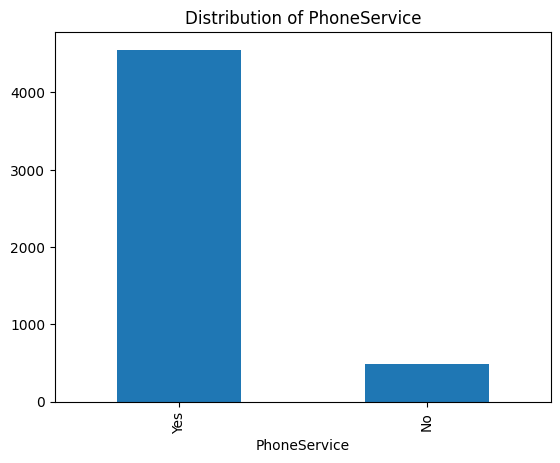


**Univariate Analysis of Feature: MultipleLines**
count     4774
unique       3
top         No
freq      2424
Name: MultipleLines, dtype: object

Unique Values and Counts:
MultipleLines
No                  2424
Yes                 2130
No phone service     220
Name: count, dtype: int64

Missing Values: 269 (5.33%)


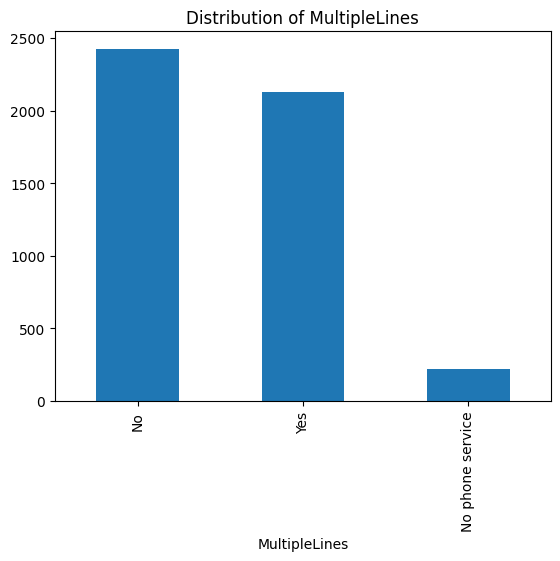


**Univariate Analysis of Feature: InternetService**
count            5043
unique              3
top       Fiber optic
freq             2248
Name: InternetService, dtype: object

Unique Values and Counts:
InternetService
Fiber optic    2248
DSL            1715
No             1080
Name: count, dtype: int64

Missing Values: 0 (0.00%)


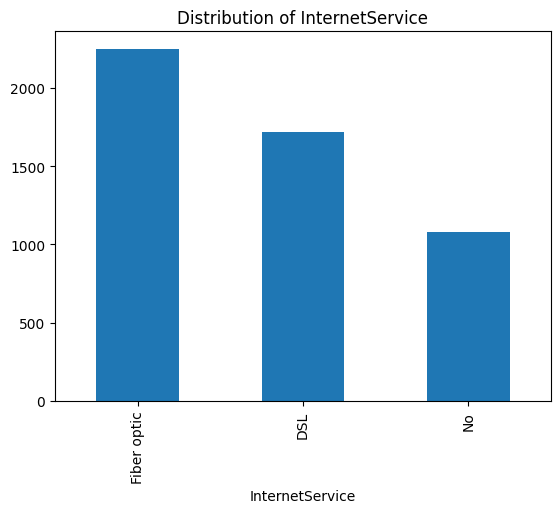


**Univariate Analysis of Feature: OnlineSecurity**
count     4392
unique       3
top         No
freq      2507
Name: OnlineSecurity, dtype: object

Unique Values and Counts:
OnlineSecurity
No                     2507
Yes                    1456
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


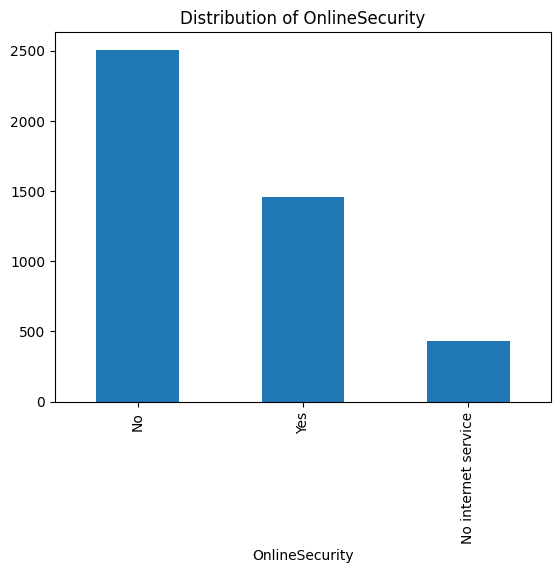


**Univariate Analysis of Feature: OnlineBackup**
count     4392
unique       3
top         No
freq      2231
Name: OnlineBackup, dtype: object

Unique Values and Counts:
OnlineBackup
No                     2231
Yes                    1732
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


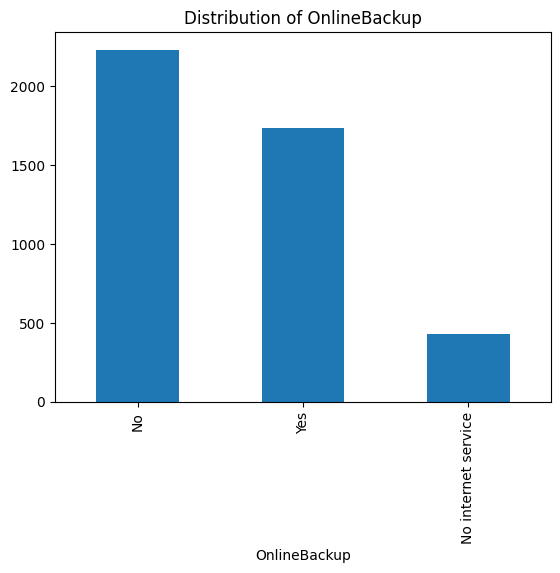


**Univariate Analysis of Feature: DeviceProtection**
count     4392
unique       3
top         No
freq      2219
Name: DeviceProtection, dtype: object

Unique Values and Counts:
DeviceProtection
No                     2219
Yes                    1744
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


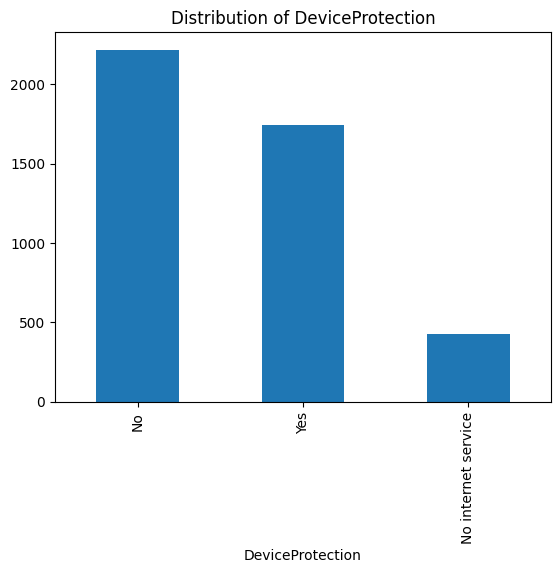


**Univariate Analysis of Feature: TechSupport**
count     4392
unique       3
top         No
freq      2472
Name: TechSupport, dtype: object

Unique Values and Counts:
TechSupport
No                     2472
Yes                    1491
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


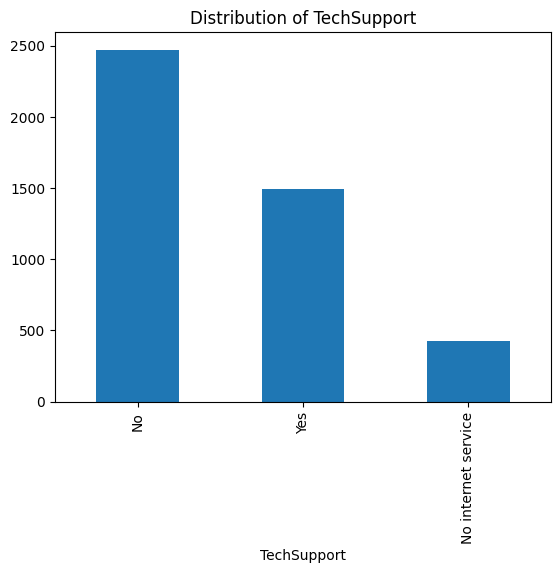


**Univariate Analysis of Feature: StreamingTV**
count     4392
unique       3
top         No
freq      2018
Name: StreamingTV, dtype: object

Unique Values and Counts:
StreamingTV
No                     2018
Yes                    1945
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


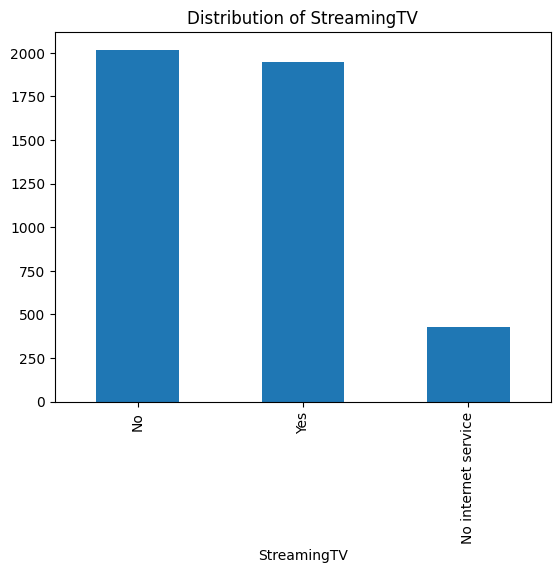


**Univariate Analysis of Feature: StreamingMovies**
count     4392
unique       3
top        Yes
freq      1982
Name: StreamingMovies, dtype: object

Unique Values and Counts:
StreamingMovies
Yes                    1982
No                     1981
No internet service     429
Name: count, dtype: int64

Missing Values: 651 (12.91%)


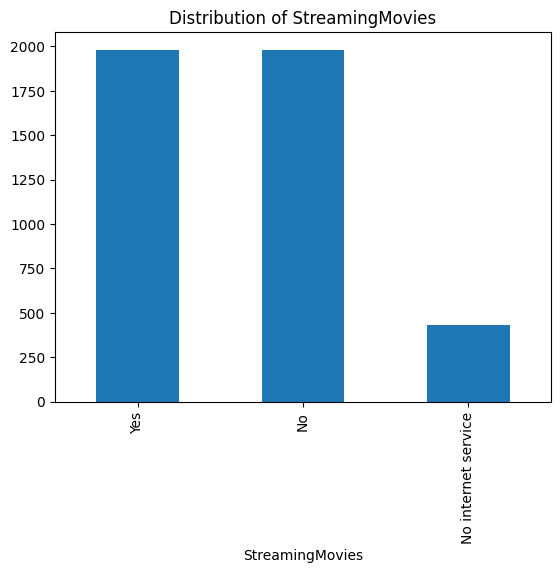


**Univariate Analysis of Feature: Contract**
count               5043
unique                 3
top       Month-to-month
freq                2744
Name: Contract, dtype: object

Unique Values and Counts:
Contract
Month-to-month    2744
Two year          1244
One year          1055
Name: count, dtype: int64

Missing Values: 0 (0.00%)


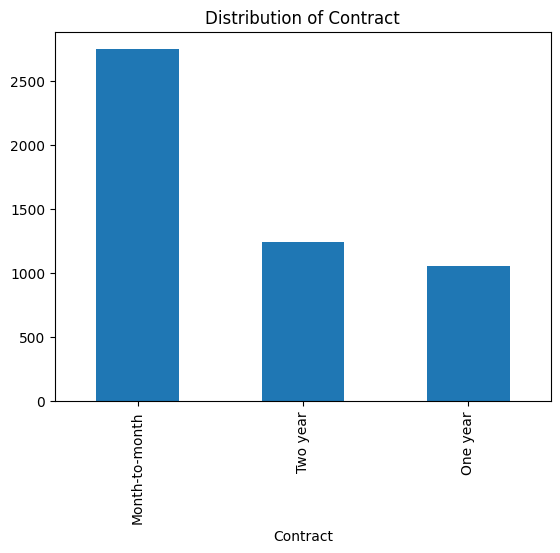


**Univariate Analysis of Feature: PaperlessBilling**
count     5043
unique       2
top        Yes
freq      2996
Name: PaperlessBilling, dtype: object

Unique Values and Counts:
PaperlessBilling
Yes    2996
No     2047
Name: count, dtype: int64

Missing Values: 0 (0.00%)


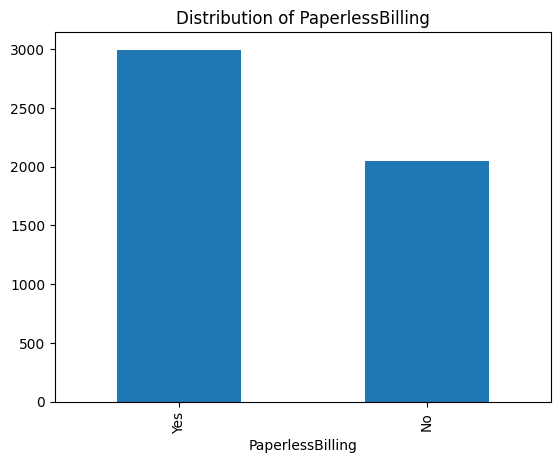


**Univariate Analysis of Feature: PaymentMethod**
count                 5043
unique                   4
top       Electronic check
freq                  1700
Name: PaymentMethod, dtype: object

Unique Values and Counts:
PaymentMethod
Electronic check             1700
Mailed check                 1128
Bank transfer (automatic)    1125
Credit card (automatic)      1090
Name: count, dtype: int64

Missing Values: 0 (0.00%)


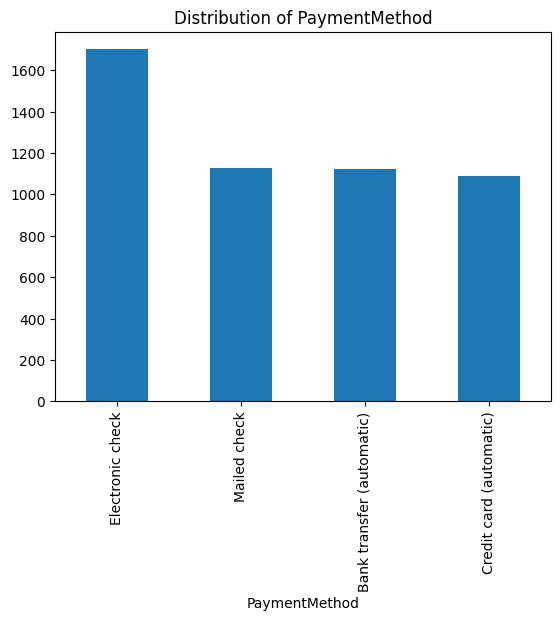


**Univariate Analysis of Feature: Churn**
count     5042
unique       2
top         No
freq      3706
Name: Churn, dtype: object

Unique Values and Counts:
Churn
No     3706
Yes    1336
Name: count, dtype: int64

Missing Values: 1 (0.02%)


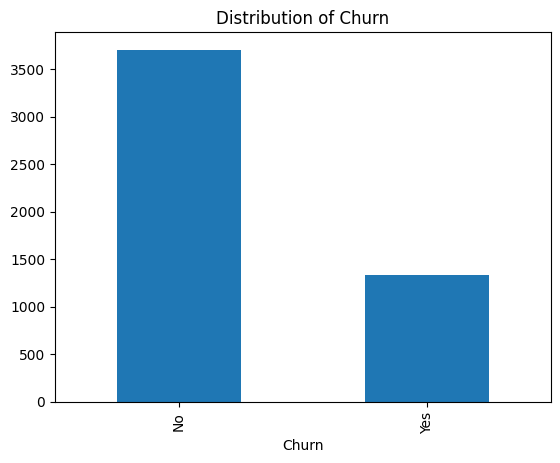

In [51]:
# List of categorical variables
categorical_features = list(train.select_dtypes(include=["object"]))

# Loop through each categorical variable
for feature in categorical_features:
    # Describe the feature
    print(f"\n**Univariate Analysis of Feature: {feature}**")
    print(train[feature].describe())

    # Print the number of unique values and their corresponding counts
    print("\nUnique Values and Counts:")
    print(train[feature].value_counts())

    # Calculate and print the percentage of missing values
    missing_values_count = train[feature].isnull().sum()
    missing_values_percentage = (missing_values_count / len(train)) * 100
    print(f"\nMissing Values: {missing_values_count} ({missing_values_percentage:.2f}%)")

    # Plot the distribution of the variable
    train[feature].value_counts().plot(kind="bar")
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}")
    plt.show()

### <b> Bivariate analysis

#### Comparing the distribution of of churn against the numerical variables

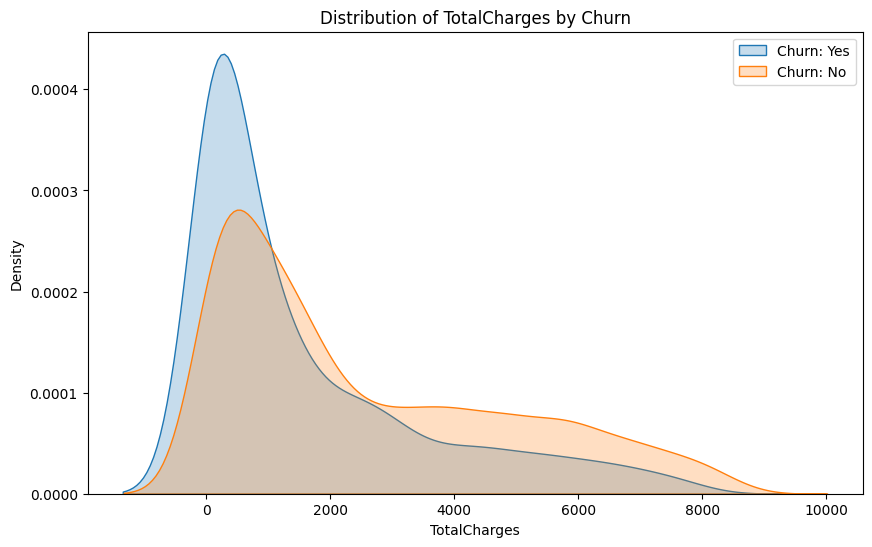

In [52]:
#Distribution of TotalCharges by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(train[train['Churn'] == 'Yes']['TotalCharges'], label='Churn: Yes', shade=True)
sns.kdeplot(train[train['Churn'] == 'No']['TotalCharges'], label='Churn: No', shade=True)

plt.title('Distribution of TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.legend()
plt.show()


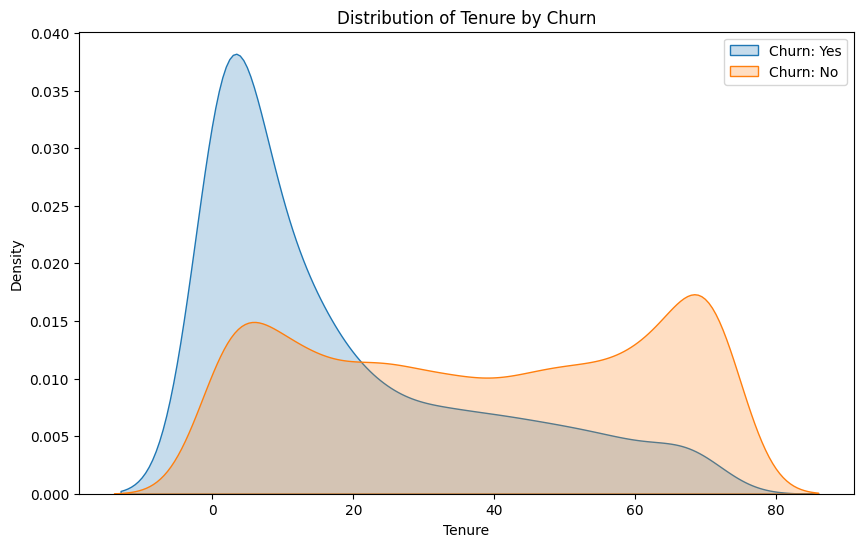

In [53]:
#Distribution of Tenure by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(train[train['Churn'] == 'Yes']['tenure'], label='Churn: Yes', shade=True)
sns.kdeplot(train[train['Churn'] == 'No']['tenure'], label='Churn: No', shade=True)

plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()
plt.show()


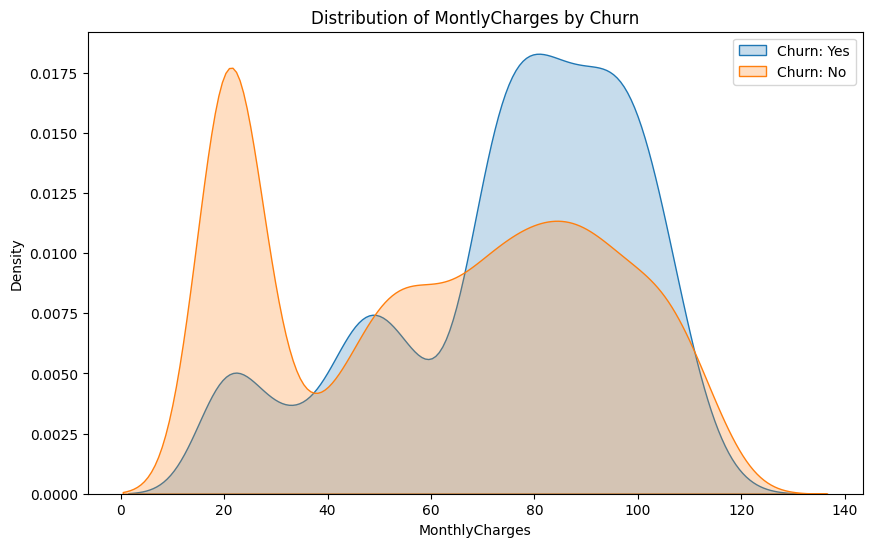

In [54]:
#Distribution of MontlyCharges by Churn
plt.figure(figsize=(10, 6))
sns.kdeplot(train[train['Churn'] == 'Yes']['MonthlyCharges'], label='Churn: Yes', shade=True)
sns.kdeplot(train[train['Churn'] == 'No']['MonthlyCharges'], label='Churn: No', shade=True)

plt.title('Distribution of MontlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')
plt.legend()
plt.show()


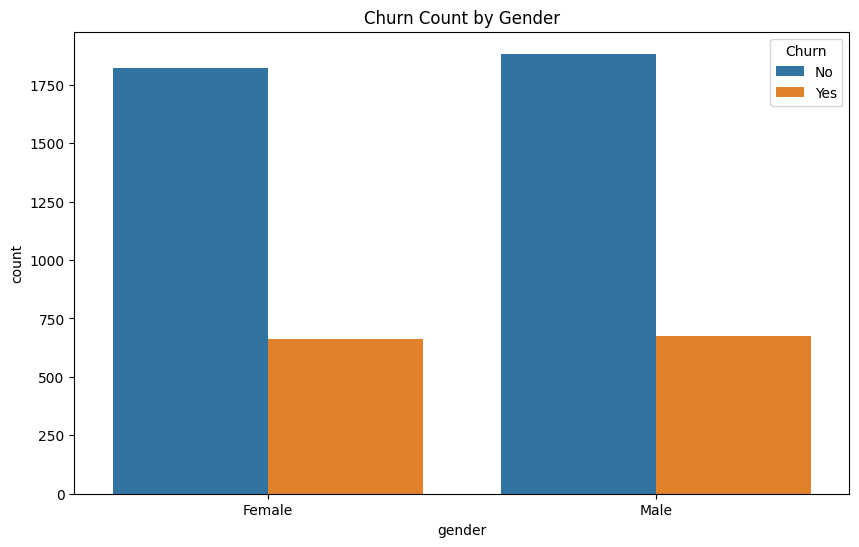

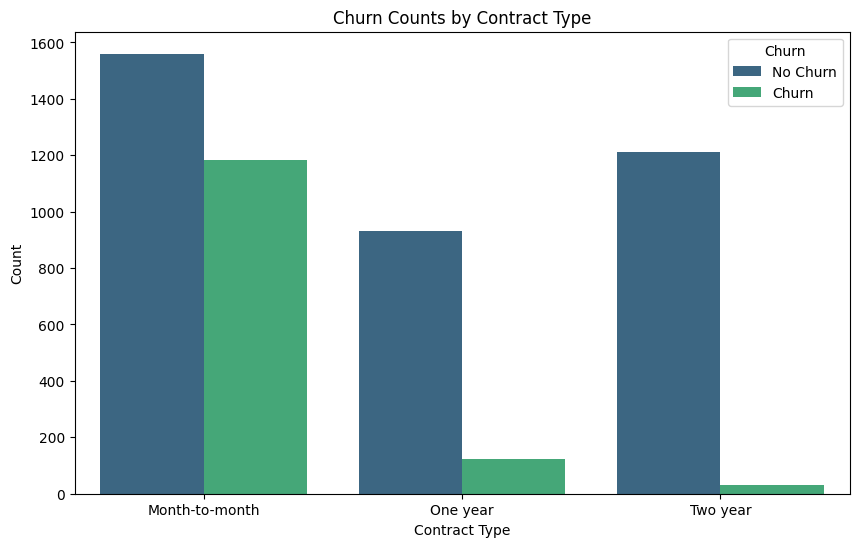

In [55]:
# Bivariate Analysis 1: Count of Churn by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=train)
plt.title('Churn Count by Gender')
plt.show()



# Bivariate Analysis 3:Bar Plot of Contract and Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=train, palette='viridis')

plt.title('Churn Counts by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()




### <b> Multivariate Analysis

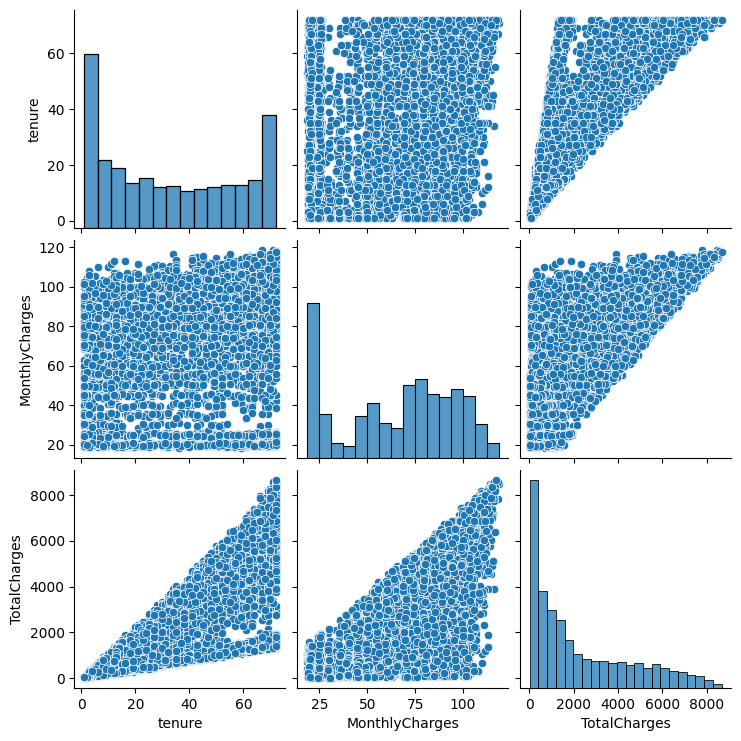

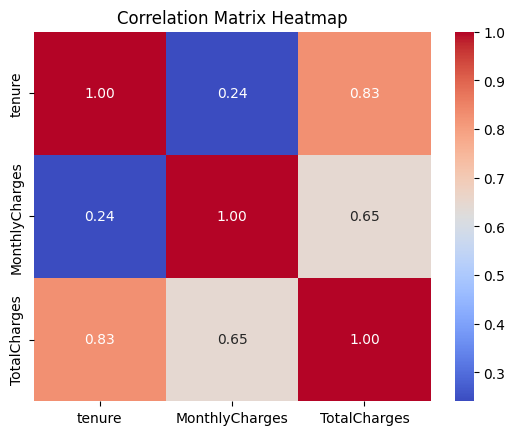

In [56]:
# Drop rows with NaN values in 'TotalCharges' column
train_cleaned = train.dropna(subset=['TotalCharges'])

# Create pair plot with the cleaned dataset
sns.pairplot(train_cleaned[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()

# Multivariate Analysis: Heatmap for correlation matrix of numeric variables
correlation_matrix = train[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()




### 1. Do senior citizens have a higher or lower likelihood of churning compared to non-senior customers?

In [57]:
# Calculate the number of senior customers who churned
senior_churned_count = train[(train['SeniorCitizen'] == 'Yes') & (train['Churn'] == 'Yes')].shape[0]

# Calculate the number of non-senior customers who churned
non_senior_churned_count = train[(train['SeniorCitizen'] == 'No') & (train['Churn'] == 'Yes')].shape[0]

# Print the results
print(f"Number of senior customers who churned: {senior_churned_count}")
print(f"Number of non-senior customers who churned: {non_senior_churned_count}")


Number of senior customers who churned: 340
Number of non-senior customers who churned: 996


In [58]:

# Calculate the total number of senior and non-senior customers
total_senior = train[train['SeniorCitizen'] == 'Yes'].shape[0]
total_non_senior = train[train['SeniorCitizen'] == 'No'].shape[0]

# Calculate the percentage of senior and non-senior customers who churned
percentage_churned_senior = (senior_churned_count / total_senior) * 100
percentage_churned_non_senior = (non_senior_churned_count / total_non_senior) * 100

# Print the results
print(f"Percentage of senior customers who churned: {percentage_churned_senior:.2f}%")
print(f"Percentage of non-senior customers who churned: {percentage_churned_non_senior:.2f}%")


Percentage of senior customers who churned: 41.51%
Percentage of non-senior customers who churned: 23.58%


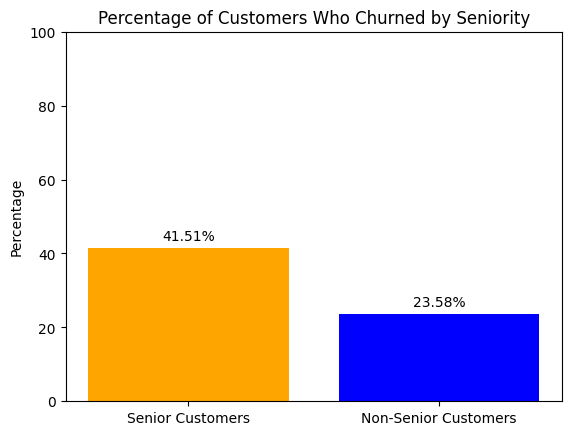

In [59]:
# Plot the results
labels = ['Senior Customers', 'Non-Senior Customers']
percentages = [percentage_churned_senior, percentage_churned_non_senior]

plt.bar(labels, percentages, color=['orange', 'blue'])
plt.title('Percentage of Customers Who Churned by Seniority')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Display the percentages on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center')

plt.show()


. The above implies that senior customers have a higher likelihood of churning compared to non-senior customers. 

. The churn rate among senior customers (41.51%) is higher than the churn rate among non-senior customers (23.58%). Therefore, based on the provided data, senior citizens have a higher likelihood of churning.


### 2. What is the relation between gender in predicting churn?

In [118]:
# Count the total number of churned customers
total_churned_count = train['Churn'].value_counts()['Yes']

# Count the number of churned customers by gender
churn_count_by_gender = train[train['Churn'] == 'Yes']['gender'].value_counts()

# Calculate the percentage of churned customers by gender
churn_percentage_by_gender = (churn_count_by_gender / total_churned_count) * 100
churn_percentage_by_gender

gender
Male      50.523952
Female    49.476048
Name: count, dtype: float64

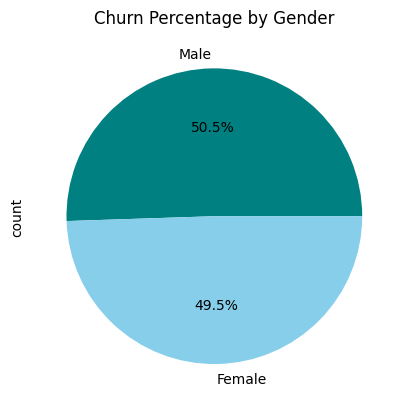

In [119]:

# Plot the pie chart
churn_percentage_by_gender.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'skyblue'])
plt.title('Churn Percentage by Gender')
plt.show()

### 3. What is the effect of changes in pricing or service plans on customer churn?

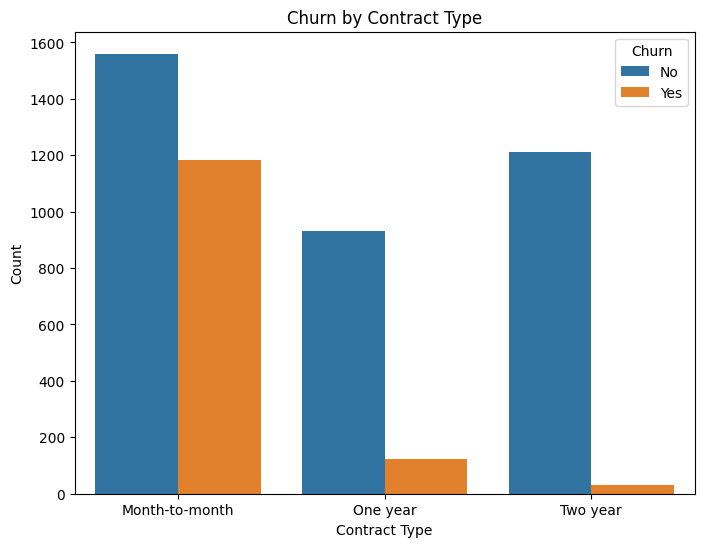

In [61]:
# Visualize churn based on different contract types
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=train)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

### 4. Are there specific patterns or trends in customer behavior leading to churn?

In [62]:

# Assuming 'training_data' is your DataFrame
# Filter data for customers who churned
churned_data = train[train['Churn'] == 'Yes']

# Group by tenure and count churned customers
tenure_churn_counts = churned_data.groupby('tenure').size().reset_index(name='count_churned')
tenure_churn_counts


,tenure,count_churned
0,1,270
1,2,88
2,3,64
3,4,51
4,5,46
...,...,...
67,68,7
68,69,6
69,70,10
70,71,4


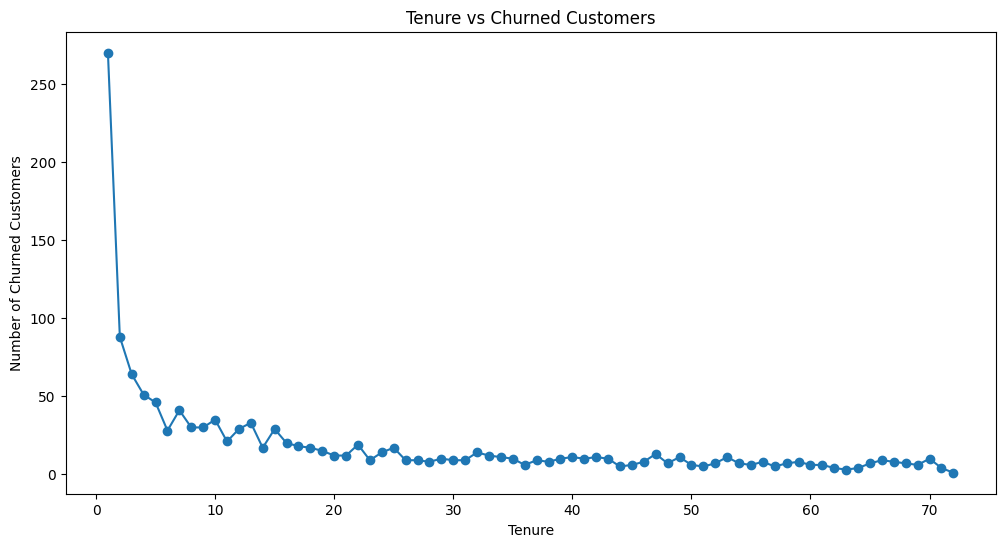

In [63]:
# Plotting  chart 
plt.figure(figsize=(12, 6))
plt.plot(tenure_churn_counts['tenure'], tenure_churn_counts['count_churned'], marker='o')
plt.xlabel('Tenure')
plt.ylabel('Number of Churned Customers')
plt.title('Tenure vs Churned Customers')

plt.show()


### 5. How does the method of payment impact customer churn

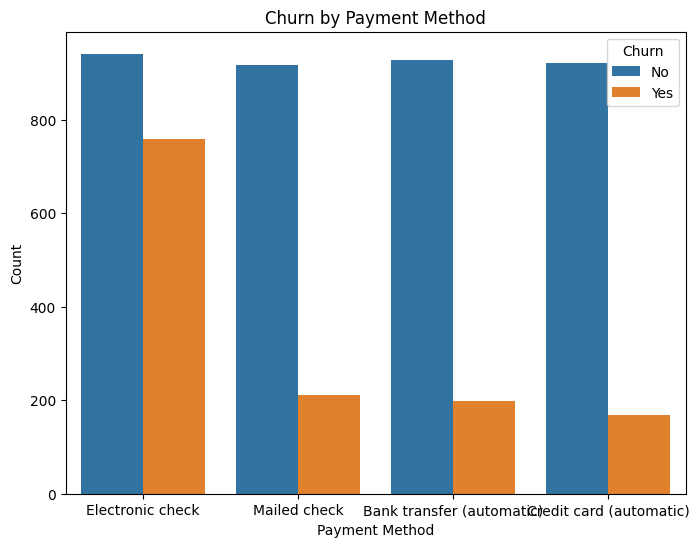

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=train)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# HYPOTHESIS TESTING

###  **Hypothesis Testing**


**Null Hypothesis:** The monthly subscription cost  has no significant effect on customer churn (Churn) from the Safari Network Service.. 

**Alternative Hypothesis:** The monthly subscription cost  has a significant effect on customer churn (Churn) from the Safari Network Service.. 

In [65]:

# Filter data for customers who churned and those who did not churn
churned = train[train['Churn'] == 'Yes']
non_churned = train[train['Churn'] == 'No']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(churned['MonthlyCharges'], non_churned['MonthlyCharges'], equal_var=False)

# Display the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Check significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: MonthlyCharges has a significant effect on customer churn.")
else:
    print("Fail to reject the null hypothesis: MonthlyCharges does not have a significant effect on customer churn.")

T-Statistic: 16.38602030072326
P-Value: 7.606640275756946e-58
Reject the null hypothesis: MonthlyCharges has a significant effect on customer churn.


Result Summary:

T-Statistic (t-value): This value, 16.386, indicates the strength of the relationship between the monthly charges and customer churn. A higher absolute t-value often suggests a more significant impact.

P-Value: The p-value, 7.606e-58 (which can be written as 0.000...0007606640275756946), is extremely low. In statistical hypothesis testing, a low p-value (typically below a significance level, often 0.05) suggests strong evidence against the null hypothesis.

Interpretation: With such a low p-value (much smaller than the commonly used significance level of 0.05), it implies strong evidence against the null hypothesis. Thus, you'd reject the null hypothesis, indicating that monthly charges indeed have a significant effect on customer churn

### Inspecting the distribution of categorical variables

## <b> Data Preparation


#### 1. Split the dataset into X and y test features

In [66]:
# Replace None values in the 'Churn' column with 'No'
train['Churn'] = train['Churn'].fillna('No')

In [67]:
X = train.drop('Churn', axis=1)
y = train['Churn']

#### 2. Split data set into training and evaluation sets

In [68]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Feature Processing and Engineering

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [70]:
# Separating input features into numeric and categorical for different pipelines
numeric_column = X.select_dtypes(include=['number']).columns
numeric_column

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [71]:
categorical_column = X.select_dtypes(include=['object']).columns
categorical_column

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [72]:
class LogTransformer:
    def __init__(self, constant=1e-5):
        self.constant = constant

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X + self.constant)

# Numeric pipeline
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('log_transformation', FunctionTransformer(LogTransformer().transform)),
    ('scaler', RobustScaler()),
    
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

# Combine the numeric and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numeric_column),
    ('categorical_pipeline', categorical_pipeline, categorical_column),
])


### Label Encoding

In [73]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the testing set using the fitted label encoder
y_test_encoded = label_encoder.transform(y_test)


In [74]:
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000014081E9D2D0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

#### Model 2:  RandomForestClassifier

In [75]:

# Create a pipeline with preprocessor and RandomForestClassifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline to the training data
random_forest_pipeline.fit(X_train, y_train_encoded)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000014081E9D2D0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

 #### Model 3: KNeighborsClassifier

In [76]:
# Create a pipeline with preprocessor and KNeighborsClassifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline to the training data
knn_pipeline.fit(X_train, y_train_encoded)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000014081E9D2D0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

. Training different models on the same dataset provides a comprehensive understanding of the data and facilitates the selection of the most appropriate model based on performance metrics and  interpretability

 #### Model 4: Logistic Regression

In [77]:
# Create a pipeline for Logistic Regression
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline to the training data for Logistic Regression
logistic_regression_pipeline.fit(X_train, y_train_encoded)





Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000014081E9D2D0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

#### Model 5: Gaussian Naive Bayes

In [78]:
# Create a pipeline for Gaussian Naive Bayes
naive_bayes_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Fit the pipeline to the training data for Gaussian Naive Bayes
naive_bayes_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000014081E9D2D0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GaussianNB())])

### Comparing Models by CLassification reports - Unbalanced

In [79]:
# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gaussian Naive Bayes':GaussianNB(),
}



In [80]:
# Create an empty DataFrame to store evaluation metrics for different models
unbalanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]


In [81]:
unbalanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.726462,0.729614,0.726462,0.727966
1,Random Forest,0.793855,0.783868,0.793855,0.785958
2,K Nearest Neighbors,0.766105,0.758341,0.766105,0.761375
3,Logistic Regression,0.798811,0.789178,0.798811,0.790940
4,Gaussian Naive Bayes,0.646184,0.795762,0.646184,0.663239


## Key Points:

1. Accuracy: Logistic Regression and Random Forest have the highest overall accuracy (0.799 and 0.794, respectively), indicating they correctly classified the most instances.
2. Precision: Gaussian Naive Bayes has the highest precision (0.796), meaning it's good at identifying true positives without many false positives.
3. Recall: Logistic Regression and Random Forest also have the highest recall (0.799), indicating they're good at identifying all true positives.
4. F1 Score: Logistic Regression has the highest F1 score (0.791), balancing precision and recall, making it a strong overall performer.
## Considerations:

Model Selection: The best model choice depends on your specific priorities and the dataset's characteristics. Consider the trade-offs between accuracy, precision, and recall in your context.
Further Evaluation: Investigate confusion matrices and ROC curves for more detailed insights into model performance.
Hyperparameter Tuning: Optimize model performance by tuning hyperparameters for each algorithm.

### Balance Dataset

In [82]:
y_train.value_counts()

Churn
No     2973
Yes    1061
Name: count, dtype: int64

. As you can see above the data is not balanced. No is the majority.

. Unbalanced data can lead to a bias in machine learning models toward the majority class, impacting overall performance.

. To address these challenges, various techniques can be employed, including: Resampling techniques (oversampling minority or undersampling majority class).

#### Balancing by Resampling by applying RandomOverSampler

In [83]:

#Balance data by oversampling

# Instantiate RandomOverSampler
sampler = RandomOverSampler(random_state=42)

# Fit and apply RandomOverSampler to the training data
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)


In [84]:
#checking if data is balanced
pd.DataFrame(y_train_resampled).value_counts()

0    2973
1    2973
Name: count, dtype: int64

. The reasons I chose Oversampling is, Oversampling addresses the scarcity of examples in the minority class of small datasets by creating additional instances, enhancing the model's exposure to meaningful patterns.

.  Oversampling maintains the integrity of the original features, preventing loss of valuable information during the modeling process.

##### Check the classification reports after balancing data to see if the there is some improvement on the models.

In [85]:
# Create an empty DataFrame to store evaluation metrics for different models
balanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
     # Fit the pipeline to the training data (resampled)
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    balanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

In [86]:
balanced_metrics

,Model_name,Accuracy,Precision,Recall,F1 Score
5,Gaussian Naive Bayes,0.632309,0.792941,0.632309,0.649032


### Balancing data using SMOTE, training it and comparing results

In [87]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Initialize an empty DataFrame to store results
smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Iterate over each model and apply SMOTE during training
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing, SMOTE, and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions on the test data
    smote_y_pred = pipeline.predict(X_test)
    
    # Calculate classification metrics using classification_report
    smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    # Extract relevant metrics
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    
    # Append the results to the DataFrame
    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Print the results DataFrame
print(smote_df)


             Model_name  Accuracy  Precision    Recall  F1_Score
0         Decision Tree  0.739346   0.748379  0.739346  0.743247
1         Random Forest  0.798811   0.796002  0.798811  0.797258
2   K Nearest Neighbors  0.675917   0.744065  0.675917  0.692792
3   Logistic Regression  0.764123   0.810215  0.764123  0.775123
4  Gaussian Naive Bayes  0.658077   0.796629  0.658077  0.675330


# Analysis and Insights:
## Top Performers:

Random Forest stands out as the best overall model, with the highest accuracy (0.798), high precision (0.796), and high recall (0.799). It consistently demonstrates strong performance across all evaluation metrics.
Logistic Regression also performs well, with accuracy of 0.764, the highest precision (0.810), and a balanced F1 score of 0.775. It's particularly adept at identifying true positives with few false positives.
Other Considerations:

Decision Tree shows moderate performance with accuracy of 0.739 and a balanced F1 score of 0.743. It can be a useful option for interpretability, as its decision-making process is easier to understand.
K Nearest Neighbors achieves a lower accuracy of 0.676, indicating it might not generalize as well to new data.
Gaussian Naive Bayes has the lowest accuracy (0.658), suggesting it might not capture the complexity of the data effectively.

## Recommendations:

Prioritize Random Forest for its overall strong performance and ability to handle complex relationships in the data.
Consider Logistic Regression if high precision is crucial for your application, as it excels at identifying true positives accurately.
Explore Decision Tree if interpretability is a major concern, but be mindful of its potential limitations in accuracy.
Investigate Further: Use tools like confusion matrices and ROC curves to gain deeper insights into how each model handles different types of errors.
Tune Hyperparameters: Optimize the performance of the chosen model by adjusting its hyperparameters to best fit the dataset.

### Feature importance and Selection

In [88]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.786262,0.372844,-0.334824,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.176276,-1.337025,-0.213806,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.420774,-1.118993,0.049529,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.173264,0.136479,0.107751,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.590951,-0.468171,-1.544861,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,0.176276,-0.368753,0.164324,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4030,0.429774,0.397437,0.694074,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4031,-0.786262,-1.313914,-1.010201,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4032,0.472791,0.160393,0.624036,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [89]:
# Define the SelectKBest feature selection method
selection = SelectKBest(mutual_info_classif, k=30)

# Initialize an empty DataFrame
fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
all_pipeline = {}

for model_name, classifier in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_selection', selection),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train_encoded)
    all_pipeline[model_name] = pipeline

    # Make predictions on test data
    smote_y_pred = pipeline.predict(X_test)
    
    # Calculate classification metrics
    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']
    
    # Append metrics to the DataFrame
    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]


In [90]:
fi_smote_df

,Model_name,Accuracy,Precision,Recall,F1_Score
0,Decision Tree,0.720515,0.731776,0.720515,0.725338
1,Random Forest,0.794846,0.790758,0.794846,0.792487
2,K Nearest Neighbors,0.704658,0.758493,0.704658,0.718956
3,Logistic Regression,0.754212,0.804556,0.754212,0.766028
4,Gaussian Naive Bayes,0.704658,0.804669,0.704658,0.720805


## Key Insights:

Random Forest is the best-performing model overall, with the highest accuracy, high precision, high recall, and a balanced F1 score. It consistently demonstrates strong performance across all evaluation metrics.
Logistic Regression and Decision Tree also perform well, with moderate accuracy and balanced F1 scores. Logistic Regression stands out with the highest precision, while Decision Tree offers potential interpretability benefits.
K Nearest Neighbors and Gaussian Naive Bayes have lower accuracy scores, suggesting they may not generalize as well to new data or capture the complexity of the dataset effectively.

## Recommendations:

Prioritize Random Forest for its overall strong performance and ability to handle complex relationships in the data.
Consider Logistic Regression if high precision is crucial for your application, as it excels at identifying true positives accurately.
Explore Decision Tree if interpretability is a major concern, but be mindful of its slightly lower accuracy compared to Random Forest.
Investigate further using confusion matrices and ROC curves to gain deeper insights into how each model handles different types of errors.
Tune hyperparameters to optimize the performance of the chosen model by adjusting its settings to best fit the dataset.

In [91]:
selection.get_support(indices=True)

array([ 0,  1,  2,  6,  9, 10, 17, 18, 19, 20, 22, 23, 24, 27, 28, 31, 32,
       34, 36, 39, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], dtype=int64)

### Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)- Overlapping

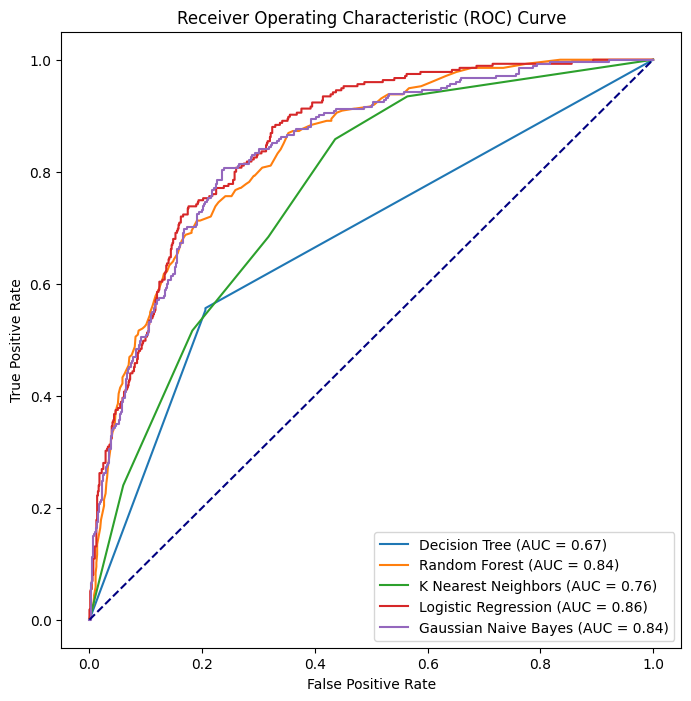

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a plot with subplots
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}
all_pipeline = {}

# Loop through models to plot ROC curves
for model_name, classifier in models.items():
    # Assuming 'preprocessor', 'SMOTE', 'selection' are defined earlier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])

    # Fit the pipeline to training data
    pipeline.fit(X_train, y_train_encoded)

    # Get predicted probabilities for positive class
    y_score = pipeline.predict_proba(X_test)[:, 1]
    all_pipeline[model_name] = pipeline
    # Calculate ROC curve and AUC
    fpr, tpr, threshold= roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df =pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Add legend in the lower right corner
ax.legend(loc='lower right')

# Show the plot
plt.show()


The closer the curve is to the upper left corner, the better the performance of the model. This is because the upper left corner represents perfect classification (100% true positive rate and 0% false positive rate).
1. Logistic Regression has the best performance, as its curve is closest to the upper left corner. It has an AUC (area under the curve) of 0.86, which is the highest among the five models.
2. Random Forest comes in second, with an AUC of 0.84.
3. K Nearest Neighbors of 0.77 .
4. Gaussian Naive Bayes has  performance, with an AUC of 0.84. Its curve is far away from the upper left corner, indicating that it's not good at distinguishing between the two classes.
5. Decision Tree 

Overall, the ROC curve provides a good visual comparison of the performance of different machine learning models on a binary classification task. In this case, it shows that Logistic Regression is the best performing model, followed by Random Forest, K Nearest Neighbors, and Decision Tree. Gaussian Naive Bayes is the least effective model in this case.

In [93]:
# Checking the threshold
roc_curve_data['Random Forest'].tail(60)

,False Positive Rate,True Positive Rate,Threshold
50,0.117166,0.578182,0.540000
51,0.122616,0.589091,0.530000
52,0.129428,0.607273,0.520000
53,0.132153,0.618182,0.510000
54,0.137602,0.621818,0.500000
55,0.141689,0.632727,0.490000
56,0.148501,0.640000,0.480000
57,0.149864,0.643636,0.470000
58,0.156676,0.654545,0.460000
59,0.163488,0.676364,0.450000


. From above you can choose the threshold that aligns with the desired trade-off between precision and recall.

Confusion matrix to check performance of model

In [94]:
# Retrieve the 'Random Forest' pipeline

forest_pipeline = all_pipeline['Random Forest']  
# Make predictions using the pipeline
forest_y_pred = forest_pipeline.predict(X_test)  

# Calculate the confusion matrix
matrix = confusion_matrix(y_test_encoded, forest_y_pred)

# Print or use the 'matrix' variable as needed
print(matrix)


[[692  42]
 [230  45]]


<Axes: >

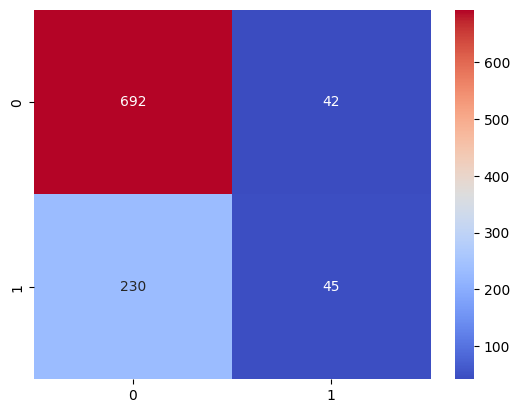

In [95]:
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

### Adjusting the threshold 

In [96]:

y_pred_proba = forest_pipeline.predict_proba(X_test)[:, 1]

# Set the threshold
threshold = 0.21

# Create binary predictions based on the threshold
binary_prediction = (y_pred_proba > threshold).astype(int)

# Calculate the confusion matrix with the threshold
threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)

# Print or use the 'threshold_matrix' variable as needed
print(threshold_matrix)


[[441 293]
 [ 54 221]]


### Hyperparameter Tuning and Retraining with RandomizedSearchCV and GridSearchCV

### GridSearchCV

In [97]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [10, 30,50 ],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Create the grid search
grid_search = GridSearchCV(forest_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transformation',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000014081E9D2D0>>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['tenure', 'Mon...
                                       ('feature_importance',
                                        SelectKBest(k=30,
                                                    score_func=<function mutual_info_classif at 0x000001408011BEB0>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [10, 30, 50]},
             scoring='accuracy')

In [98]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}


### Train model using best parameters

In [99]:
# Define the pipeline with the RandomForest classifier
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('feature_importance', selection),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid with the best parameters
best_params = {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

# Set the best parameters to the pipeline
forest_pipeline.set_params(**best_params)

# Fit the pipeline to the training data
forest_pipeline.fit(X_train, y_train_encoded)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000014081E9D2D0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges']...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x000001408011BEB0>)),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])

#### Evaluation result

In [100]:
# Make predictions using the new pipeline
forest_y_pred_best = forest_pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, forest_y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       734
           1       0.61      0.64      0.62       275

    accuracy                           0.79      1009
   macro avg       0.74      0.74      0.74      1009
weighted avg       0.79      0.79      0.79      1009



In [101]:
prediction=forest_pipeline.predict(df_churn_last_2000)

In [102]:
from sklearn.preprocessing import LabelEncoder
prediction=label_encoder.inverse_transform(prediction)

In [103]:
df_churn_last_2000['Churn'] = prediction

In [104]:
df_churn_last_2000

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,No,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,3557-HTYWR,Female,No,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30,No
1997,4816-JBHOV,Male,Yes,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
1998,8920-NAVAY,Male,Yes,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


Model Persistence

In [105]:
# Model Persistence
import joblib
import os  # Import the os module

# Create the "models" directory if it doesn't exist
os.makedirs('./models', exist_ok=True)

# Save the trained model
joblib.dump(forest_pipeline, './models/finished_model.joblib')

# Save the label encoder
joblib.dump(label_encoder, './models/encoder.joblib')

['./models/encoder.joblib']

In [106]:
df_churn_last_2000.to_csv('Training Data/training_data.csv', index=False)